In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import infomap

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set_theme(style='whitegrid')
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
%reload_ext autoreload
%autoreload 2
from src.pybioregions import bioregions

## Infomap Bioregions

For a basic tutorial, see [this notebook](https://github.com/mapequation/infomap-tutorial-notebooks/blob/main/IX.C.%20Infomap%20Bioregions.ipynb).

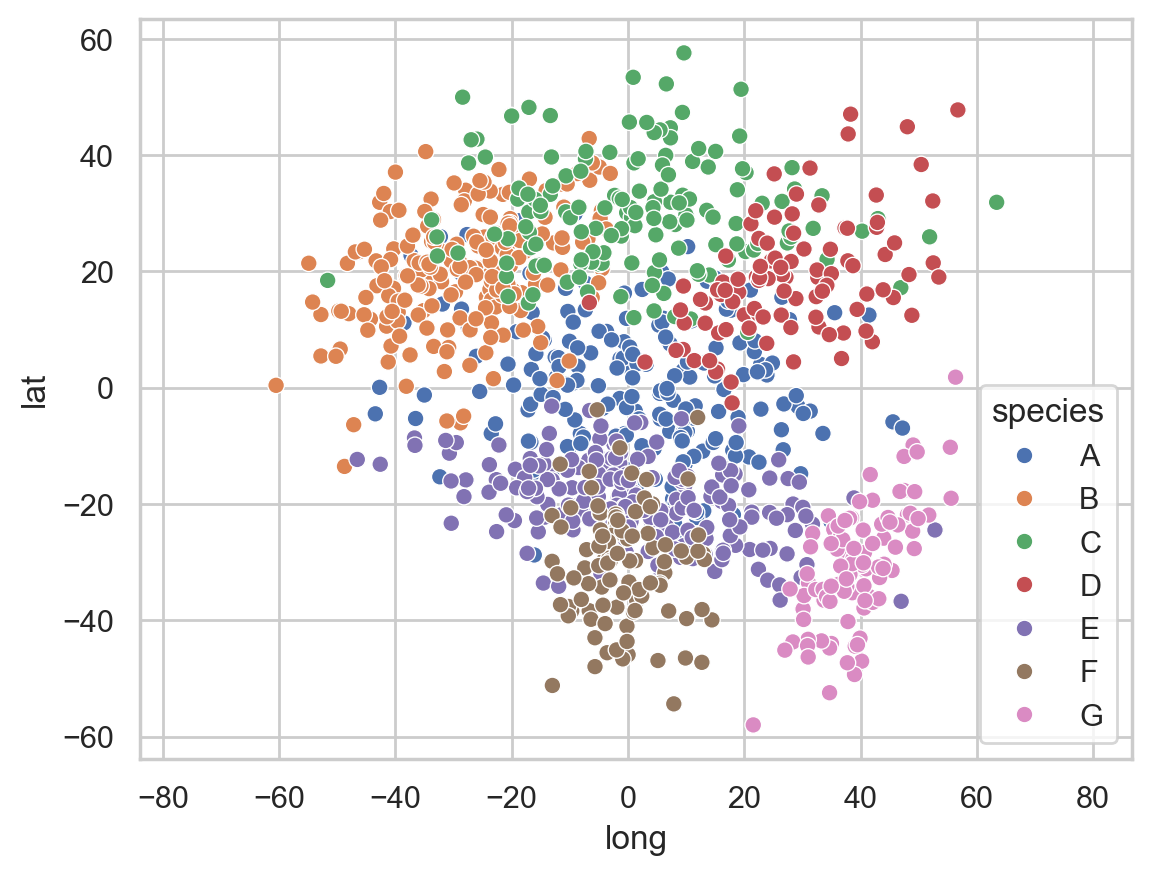

In [3]:
def sample_species_distribution(mean, cov, n_samples, name):
    df = pd.DataFrame(np.random.multivariate_normal(mean, cov, n_samples), columns=['long', 'lat'])
    df['species'] = name
    return df

species_params = [
    dict(mean=[0,0], cov=[[300, -50], [-50, 150]], n_samples=200, name="A"),
    dict(mean=[-30,20], cov=[[150, 50], [50, 100]], n_samples=200, name="B"),
    dict(mean=[0,30], cov=[[400, 0], [0, 100]], n_samples=150, name="C"),
    dict(mean=[30,20], cov=[[150, 50], [50, 100]], n_samples=100, name="D"),
    dict(mean=[0,-20], cov=[[300, -50], [-50, 50]], n_samples=200, name="E"),
    dict(mean=[0,-30], cov=[[50, 0], [0, 100]], n_samples=100, name="F"),
    dict(mean=[40,-30], cov=[[50, 50], [50, 100]], n_samples=100, name="G"),
]
def generate_species_distributions(species_params, seed=0):
    np.random.seed(seed)
    return pd.concat([sample_species_distribution(**params) for params in species_params], ignore_index=True)

df_records = generate_species_distributions(species_params)
sns.scatterplot(df_records, x="long", y="lat", hue="species").axis('equal');


In [4]:
br = bioregions.Bioregions(df_records, latlong_cols=["lat", "long"], resolution=4)

Got 1050 occurrence records.
7 species found!
Bin occurrences to grid cells with resolution 4 degrees...
423 cells generated!
Create cell geometry...
Generate network...
Generate node data...
Initialization done!


In [5]:
br.partition()

Partition Graph with 430 nodes and 560 edges...
Found 1 modular levels with 6 top modules, [5.7] effective modules per level and codelength 5.370259808149121 with relative codelength savings 19.5%
Number of bioregions per level: [6]


<Axes: title={'center': 'Level 1/1: 6 modules, 6 bioregions, 5.37 bits (19.5% savings)'}>

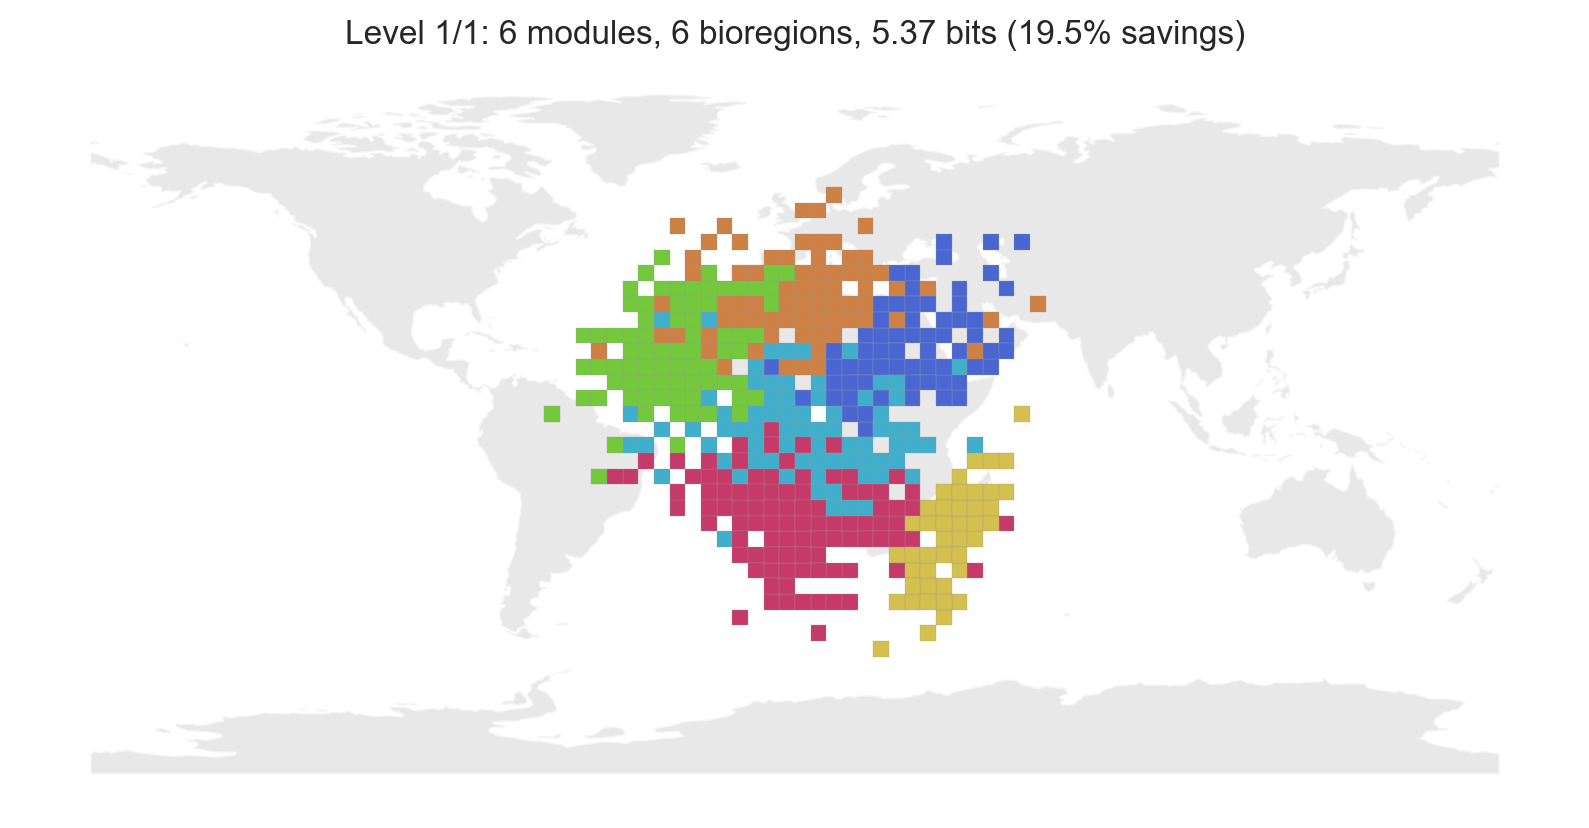

In [6]:
br.plot()

In [7]:
br.df

,long,lat,species,count,ilat,ilong,ilat_ilong,cell_id,species_id
0,-28.625394,13.522421,A,1,3,-8,3_-8,0,423
1,-9.088009,29.941740,A,1,7,-3,7_-3,1,423
2,-35.019423,-1.254875,A,1,-1,-9,-1_-9,2,423
3,-16.651776,3.205244,A,1,0,-5,0_-5,3,423
4,3.135503,4.032686,A,1,1,0,1_0,4,423
...,...,...,...,...,...,...,...,...,...
1045,31.001705,-46.317136,G,1,-12,7,-12_7,390,429
1046,40.511861,-30.114530,G,1,-8,10,-8_10,385,429
1047,39.477023,-44.210069,G,1,-12,9,-12_9,393,429
1048,40.768708,-36.610475,G,1,-10,10,-10_10,396,429


In [8]:
br.df_nodes

,name,type,degree,module,module_0
node,,,,,
423,A,species,122,2,2
424,B,species,95,4,4
425,E,species,88,1,1
426,C,species,96,3,3
427,D,species,66,5,5
...,...,...,...,...,...
418,-15_5,cell,1,6,6
419,-5_12,cell,1,6,6
420,-4_10,cell,1,6,6


In [9]:
br.df_cells

,cell_name,ilat,ilong,geometry,module,bioregion,degree,endemic_count,module_0,bioregion_0
cell_id,,,,,,,,,,
0,3_-8,3,-8,"POLYGON ((-28 12, -28 16, -32 16, -32 12, -28 ...",4,1,2,NaN,4,1
1,7_-3,7,-3,"POLYGON ((-8 28, -8 32, -12 32, -12 28, -8 28))",3,3,3,NaN,3,3
2,-1_-9,-1,-9,"POLYGON ((-32 -4, -32 0, -36 0, -36 -4, -32 -4))",2,2,1,NaN,2,2
3,0_-5,0,-5,"POLYGON ((-16 0, -16 4, -20 4, -20 0, -16 0))",2,2,1,NaN,2,2
4,1_0,1,0,"POLYGON ((4 4, 4 8, 0 8, 0 4, 4 4))",5,4,2,NaN,5,4
...,...,...,...,...,...,...,...,...,...,...
418,-15_5,-15,5,"POLYGON ((24 -60, 24 -56, 20 -56, 20 -60, 24 -...",6,5,1,NaN,6,5
419,-5_12,-5,12,"POLYGON ((52 -20, 52 -16, 48 -16, 48 -20, 52 -...",6,5,1,NaN,6,5
420,-4_10,-4,10,"POLYGON ((44 -16, 44 -12, 40 -12, 40 -16, 44 -...",6,5,1,NaN,6,5


In [10]:
br.df_species

,species,count,module,degree,module_0
id,,,,,
423,A,200,2,122,2
424,B,200,4,95,4
425,E,200,1,88,1
426,C,150,3,96,3
427,D,100,5,66,5
428,F,100,1,50,1
429,G,100,6,43,6


In [11]:
df_records

,long,lat,species
0,-28.625394,13.522421,A
1,-9.088009,29.941740,A
2,-35.019423,-1.254875,A
3,-16.651776,3.205244,A
4,3.135503,4.032686,A
...,...,...,...
1045,31.001705,-46.317136,G
1046,40.511861,-30.114530,G
1047,39.477023,-44.210069,G
1048,40.768708,-36.610475,G


In [12]:
species_col = "species"
latlong_cols=["latitude", "longitude"]
df = bioregions.parse_csv("../data/data/species/Mammals/mammals_neotropics.csv", usecols=[species_col]+latlong_cols, nrows=50000)
df

,species,longitude,latitude
0,Rattus rattus,-38.33333,-12.90000
1,Peromyscus maniculatus,-98.29564,19.26563
2,Sciurus aureogaster,-98.62194,19.02278
3,Balantiopteryx plicata,-99.23427,18.74371
4,Desmodus rotundus,-99.23427,18.74371
...,...,...,...
49995,Mazama gouazoupira,-58.17225,-25.11401
49996,Mazama gouazoupira,-58.08012,-25.11613
49997,Mazama gouazoupira,-58.27641,-25.03628
49998,Mazama gouazoupira,-58.17324,-25.12037


In [13]:
br = bioregions.Bioregions(df, species_col=species_col, latlong_cols=latlong_cols, resolution=1)

Got 50000 occurrence records.
1345 species found!
Bin occurrences to grid cells with resolution 1 degrees...
1202 cells generated!
Create cell geometry...
Generate network...
Generate node data...
Initialization done!


Partition Graph with 2547 nodes and 22644 edges...
Found 1 modular levels with 52 top modules, [3.8] effective modules per level and codelength 9.62989939299264 with relative codelength savings 5.6%
Number of bioregions per level: [52]


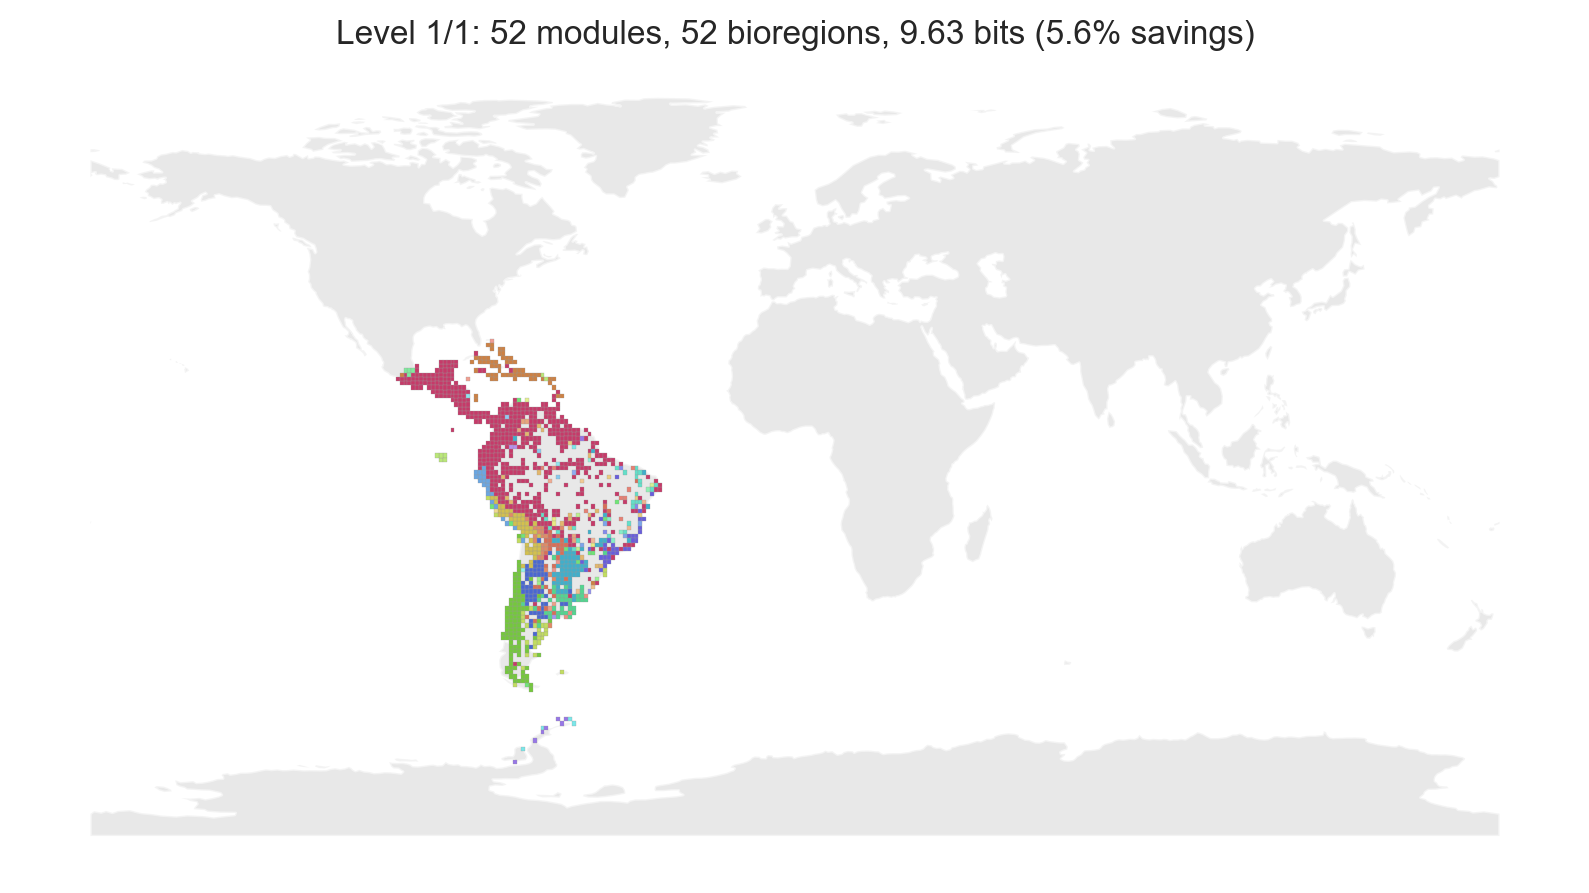

In [14]:
br.partition(num_trials=10)
br.plot();